In [4]:
%store -r endpoint_name
endpoint_name

'forecasting-deepar-2021-03-30-16-09-46-185'

In [14]:
%store -r training_dataset
training_dataset

2020-01-01 00:00:00      23.988535
2020-01-01 01:00:00     -30.676209
2020-01-01 02:00:00      90.003015
2020-01-01 03:00:00     -57.712445
2020-01-01 04:00:00     -22.221766
                          ...     
2020-01-19 13:00:00    1560.265493
2020-01-19 14:00:00    1814.918124
2020-01-19 15:00:00    1659.630602
2020-01-19 16:00:00    1894.520627
2020-01-19 17:00:00    1944.680454
Freq: H, Length: 450, dtype: float64

In [32]:
%store -r target_dataset
target_dataset

2020-01-19 17:00:00    1944.680454
2020-01-19 18:00:00     102.593104
2020-01-19 19:00:00    -224.525666
2020-01-19 20:00:00       2.125743
2020-01-19 21:00:00    -253.289114
2020-01-19 22:00:00      78.326029
2020-01-19 23:00:00     -47.724199
2020-01-20 00:00:00     -75.239860
2020-01-20 01:00:00     134.046180
2020-01-20 02:00:00     -20.991278
2020-01-20 03:00:00     171.820317
2020-01-20 04:00:00      15.779624
2020-01-20 05:00:00     227.819568
2020-01-20 06:00:00     163.627100
2020-01-20 07:00:00     271.899731
2020-01-20 08:00:00     224.078065
2020-01-20 09:00:00     152.396095
2020-01-20 10:00:00     251.521640
2020-01-20 11:00:00     205.001667
2020-01-20 12:00:00     506.492917
2020-01-20 13:00:00     332.333435
2020-01-20 14:00:00     334.472777
2020-01-20 15:00:00     196.961034
2020-01-20 16:00:00     210.529843
2020-01-20 17:00:00     346.652564
2020-01-20 18:00:00     415.530627
2020-01-20 19:00:00     151.049888
2020-01-20 20:00:00     379.347112
2020-01-20 21:00:00 

In [24]:
%store -r freq

In [28]:
%store -r prediction_length
prediction_length

50

In [6]:
import sagemaker 
import boto3
from sagemaker import get_execution_role 

role = get_execution_role()
session = sagemaker.Session()

In [7]:
Predictor = sagemaker.predictor.Predictor

In [9]:
predictor = Predictor(endpoint_name=endpoint_name, sagemaker_session=session)

In [10]:
predictor.serializer = sagemaker.serializers.JSONSerializer()

In [11]:
quantiles=["0.1", "0.5", "0.9"]

configuration = {
    "num_samples": 100,
    "output_types": ["quantiles"],
    "quantiles": quantiles,
}

In [12]:
def series_to_object(data):
    return {"start": str(data.index[0]), "target": list(data)}

In [16]:
instances = [series_to_object(training_dataset)]

http_request_data = {"instances": instances, "configuration": configuration}
http_request_data

{'instances': [{'start': '2020-01-01 00:00:00',
   'target': [23.98853501218122,
    -30.676209151935296,
    90.0030153056325,
    -57.71244460444761,
    -22.221766198307236,
    -9.56927138971843,
    11.288781282165441,
    99.54837073680153,
    83.89499139329607,
    -17.74404022376038,
    214.09454689578556,
    201.6705951516786,
    243.19071288555233,
    323.7421163549171,
    176.53352799316835,
    151.33472032189178,
    217.94782849478852,
    391.13949013800925,
    432.76160958603515,
    488.342986296729,
    217.15154175548685,
    393.28239352293144,
    218.54571702947908,
    417.21176052879014,
    504.92873236087974,
    361.5314628162686,
    378.0194767034043,
    438.5664262160045,
    584.2029752047589,
    622.9052423280799,
    639.8167920989599,
    624.4476179767306,
    800.4126885956675,
    672.0044565120055,
    838.260132030914,
    1097.7863863320463,
    1154.218895531706,
    858.6260614384336,
    1244.3984225652664,
    1035.2151839347266,
   

In [17]:
response = predictor.predict(http_request_data)
response

b'{"predictions":[{"quantiles":{"0.1":[67.568359375,-118.406036377,-450.1945800781,-446.5180664062,-303.3362731934,-146.392074585,-68.0941467285,-38.0875549316,1.4627380371,35.305305481,-4.2846984863,9.3209228516,40.8067321777,57.1789627075,34.5896759033,132.6701660156,80.5105056763,136.1895751953,209.3683319092,212.7250823975,90.4215927124,31.4347610474,11.5610733032,66.0409545898,126.736289978,173.1766815186,224.5084381104,228.6068572998,287.4707946777,332.2111816406,382.1552124023,454.2391357422,511.8706665039,534.4677734375,522.2650756836,655.7258911133,673.59375,718.9928588867,804.1254882812,907.2231445312,973.6431884766,1077.3992919922,1149.2452392578,1190.9088134766,1205.4086914062,1340.5334472656,1368.5513916016,1484.4584960938,1367.3184814453,982.4865112305],"0.5":[829.8819580078,457.8013916016,48.8704795837,-61.2683944702,-45.9684333801,16.477437973,55.0266609192,54.9498405457,98.9450378418,120.0215988159,69.9474411011,89.8862609863,130.0719604492,145.3507385254,153.043731689

In [21]:
import json

response_data = json.loads(response)
response_data

{'predictions': [{'quantiles': {'0.1': [67.568359375,
     -118.406036377,
     -450.1945800781,
     -446.5180664062,
     -303.3362731934,
     -146.392074585,
     -68.0941467285,
     -38.0875549316,
     1.4627380371,
     35.305305481,
     -4.2846984863,
     9.3209228516,
     40.8067321777,
     57.1789627075,
     34.5896759033,
     132.6701660156,
     80.5105056763,
     136.1895751953,
     209.3683319092,
     212.7250823975,
     90.4215927124,
     31.4347610474,
     11.5610733032,
     66.0409545898,
     126.736289978,
     173.1766815186,
     224.5084381104,
     228.6068572998,
     287.4707946777,
     332.2111816406,
     382.1552124023,
     454.2391357422,
     511.8706665039,
     534.4677734375,
     522.2650756836,
     655.7258911133,
     673.59375,
     718.9928588867,
     804.1254882812,
     907.2231445312,
     973.6431884766,
     1077.3992919922,
     1149.2452392578,
     1190.9088134766,
     1205.4086914062,
     1340.5334472656,
     1368.5513

In [26]:
single_result = response_data['predictions'][0]
single_result

{'quantiles': {'0.1': [67.568359375,
   -118.406036377,
   -450.1945800781,
   -446.5180664062,
   -303.3362731934,
   -146.392074585,
   -68.0941467285,
   -38.0875549316,
   1.4627380371,
   35.305305481,
   -4.2846984863,
   9.3209228516,
   40.8067321777,
   57.1789627075,
   34.5896759033,
   132.6701660156,
   80.5105056763,
   136.1895751953,
   209.3683319092,
   212.7250823975,
   90.4215927124,
   31.4347610474,
   11.5610733032,
   66.0409545898,
   126.736289978,
   173.1766815186,
   224.5084381104,
   228.6068572998,
   287.4707946777,
   332.2111816406,
   382.1552124023,
   454.2391357422,
   511.8706665039,
   534.4677734375,
   522.2650756836,
   655.7258911133,
   673.59375,
   718.9928588867,
   804.1254882812,
   907.2231445312,
   973.6431884766,
   1077.3992919922,
   1149.2452392578,
   1190.9088134766,
   1205.4086914062,
   1340.5334472656,
   1368.5513916016,
   1484.4584960938,
   1367.3184814453,
   982.4865112305],
  '0.5': [829.8819580078,
   457.80139160

In [25]:
import pandas as pd

prediction_time = training_dataset.index[-1] + pd.Timedelta(1, unit=freq)
prediction_time

Timestamp('2020-01-19 18:00:00', freq='H')

In [29]:
prediction_index = pd.date_range(
    start=prediction_time, freq=freq, periods=prediction_length
)

prediction_index

DatetimeIndex(['2020-01-19 18:00:00', '2020-01-19 19:00:00',
               '2020-01-19 20:00:00', '2020-01-19 21:00:00',
               '2020-01-19 22:00:00', '2020-01-19 23:00:00',
               '2020-01-20 00:00:00', '2020-01-20 01:00:00',
               '2020-01-20 02:00:00', '2020-01-20 03:00:00',
               '2020-01-20 04:00:00', '2020-01-20 05:00:00',
               '2020-01-20 06:00:00', '2020-01-20 07:00:00',
               '2020-01-20 08:00:00', '2020-01-20 09:00:00',
               '2020-01-20 10:00:00', '2020-01-20 11:00:00',
               '2020-01-20 12:00:00', '2020-01-20 13:00:00',
               '2020-01-20 14:00:00', '2020-01-20 15:00:00',
               '2020-01-20 16:00:00', '2020-01-20 17:00:00',
               '2020-01-20 18:00:00', '2020-01-20 19:00:00',
               '2020-01-20 20:00:00', '2020-01-20 21:00:00',
               '2020-01-20 22:00:00', '2020-01-20 23:00:00',
               '2020-01-21 00:00:00', '2020-01-21 01:00:00',
               '2020-01-

In [30]:
output = pd.DataFrame(data=single_result['quantiles'], index=prediction_index)
output

,0.1,0.5,0.9
2020-01-19 18:00:00,67.568359,829.881958,1531.706665
2020-01-19 19:00:00,-118.406036,457.801392,939.676514
2020-01-19 20:00:00,-450.194580,48.870480,589.708008
2020-01-19 21:00:00,-446.518066,-61.268394,319.575195
2020-01-19 22:00:00,-303.336273,-45.968433,242.676178
2020-01-19 23:00:00,-146.392075,16.477438,210.252762
2020-01-20 00:00:00,-68.094147,55.026661,178.366119
2020-01-20 01:00:00,-38.087555,54.949841,147.108994
2020-01-20 02:00:00,1.462738,98.945038,178.847839
2020-01-20 03:00:00,35.305305,120.021599,205.905762


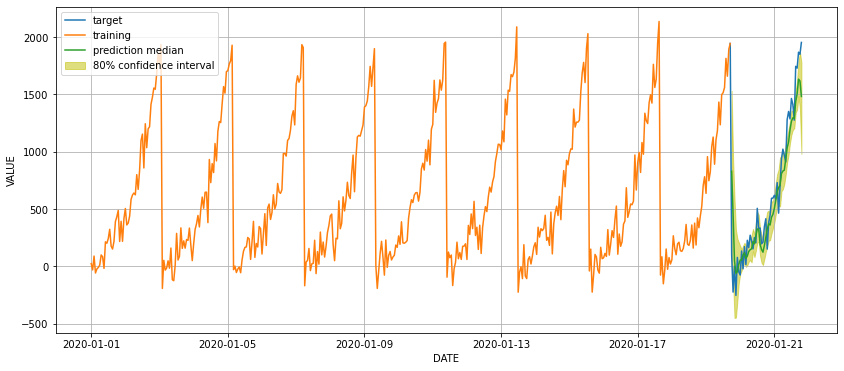

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14,6))
plt.plot(target_dataset.index, target_dataset, label="target")
plt.plot(training_dataset.index, training_dataset, label="training")
plt.grid(True)
plt.xlabel("DATE")
plt.ylabel("VALUE")    

p10 = output["0.1"]
p90 = output["0.9"]
plt.fill_between(p10.index, p10, p90, color="y", alpha=0.5, label="80% confidence interval")

plt.plot(output["0.5"].index, output["0.5"], label="prediction median")

plt.legend()
plt.show()